<a href="https://colab.research.google.com/github/Prethumnan/guvi-project/blob/main/Assignment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [ ]:
df = pd.read_csv("car_data.csv")

In [ ]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [ ]:
df.shape

(804, 12)

1)Find the linear regression equation for mileage vs price.

In [ ]:
df["Mileage"]=df["Mileage"].apply(lambda x:x/max(df["Mileage"]))
df["Price"]=np.log(1+df["Price"])
x=df[["Mileage"]]
y=df["Price"]

In [ ]:
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [ ]:
m=model.coef_ #slope
c=model.intercept_  #intercept
print("slope,m=",m)
print("intercept,c=",c)

slope,m= [-0.37316301]
intercept,c= 10.025979632996838


Linear regression equation for mileage vs price, y=(m*x)+c

2)Chart the original data and the equation on the chart.

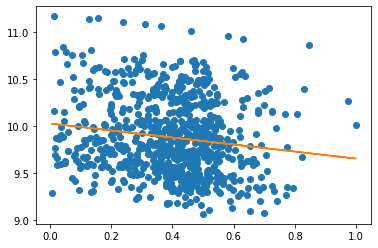

In [ ]:
a=df["Mileage"]
b=df["Price"]
plt.plot(a,b,"o")
np.polyfit(a,b,1)
plt.plot(a,m*a+c)


3)Find the equation's  R2  score?

In [ ]:
print("r2 score : ",model.score(x,y))

r2 score :  0.021909715861809564


**Part 2**

2)Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

In [ ]:
col=[i for i in data.columns]
print(col)
new_col=[]
new_col.append(col[1])
f=col[6:]
for i in f:
  new_col.append(i)
print(new_col)

['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']


In [ ]:
a=df[new_col]
b=df["Price"]
model_1=LinearRegression()
model_1.fit(a,b)


LinearRegression()

In [ ]:
s=model_1.coef_ #slope
i=model_1.intercept_  #intercept
print("slope,s=",s)
print("intercept,i=",i)

slope,s= [-0.37539629  0.07736077  0.07022084 -0.03003916  0.31336608 -0.08992764
  0.11943828]
intercept,i= 9.250754770515277


Linear regression equation, y=s1*x1 + s2*x2 + s3*x3 + s4*x4 + s5*x5 + s6*x6 + x7*s7+i

2)Find the equation's  R2  score

In [ ]:
print("r2 score : ",model_1.score(a,b))

r2 score :  0.4862779194567459


3)Find the combination of the factors that is the best predictor for price?

In [ ]:
for i in new_col:
  c=df[[i]]
  d=df["Price"]
  model_new=LinearRegression()
  model.fit(c,d)
  print(i,":",model.score(c,d))

Mileage : 0.021909715861809564
Cylinder : 0.34020404423733497
Liter : 0.34858200701274566
Doors : 0.008386742445106288
Cruise : 0.24366285035824287
Sound : 0.019388373638745904
Leather : 0.016917123420676194


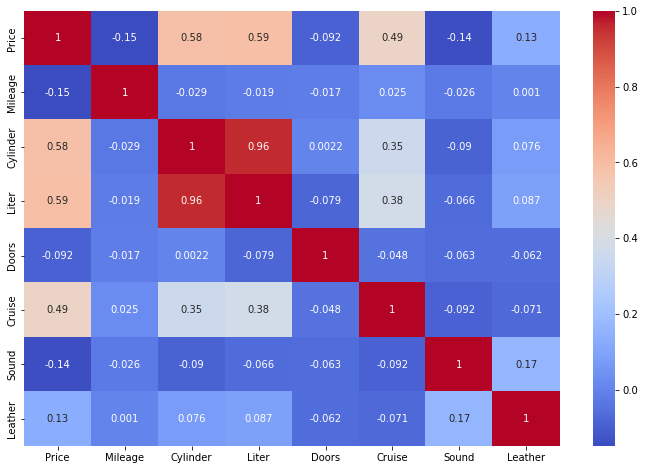

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True)

From the above observation,the combination of best factors are Cylinder,Liter and Cruise